## Intermediate Machine Learning: Assignment 1

**Deadline**

Assignment 1 is due Thursday, September 25 11:59 pm. Late work will not be accepted as per the course policies (see the syllabus on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Acknowledge any use of an AI system such as ChatGPT or Copilot.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the pdf on Colab, you can simply use File -> Print (Cmd/Ctrl+P). Please be sure that all of your work appears in the output, and that long lines are not truncated in any cell.

**Topics**

 * Lasso
 * Bias-variance decomposition
 * Mercer kernels
 * LOOCV for kernel smoothing

This assignment will also help to solidify your Python and Jupyter notebook skills.


### Problem 1: Roping variables with the lasso (15 points)

In this exercise, we'll employ the lasso regression technique to identify key predictor variables from the diabetes dataset. This dataset is used in the study by Efron, Hastie, Johnstone, and Tibshirani (2004, *Annals of Statistics*, "Least Angle Regression"). The primary goal is to predict a quantitative measure of diabetes progression one year after baseline, based on ten standardized physiological and biochemical measurements.


The *Diabetes* dataset in the `sklearn.datasets` package is a classic benchmark for regression. It contains 442 samples with 10 features that have been centered to mean zero but not scaled to unit variance. The predictors include age, sex, body mass index (BMI), blood pressure (BP), and six blood serum measures (s1–s6: cholesterol, LDL, HDL, cholesterol/HDL ratio, triglycerides, and blood sugar). The target is a quantitative measure of diabetes progression one year after baseline. You can find details at https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset.

**Your tasks are as follows**:

1. **Plotting Lasso Paths**: Generate a visualization of the lasso regularization paths.
2. **Identifying Key Predictors**: Determine which coefficients of \( \beta \) are non-zero.
3. **Estimating Coefficients**: Provide the best estimate for these non-zero coefficients.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
%matplotlib inline

Just run the next cell to read in the data.

In [40]:
# Insert this code just above problem 1.1
X, y = load_diabetes(return_X_y=True)
n, p = X.shape
print("Number of rows: {}".format(n))
print("Number of columns: {}".format(p))
#print(y)
# Note that X, y = load_diabetes(return_X_y=True) has already been standardized.
# You can explore the raw data with the following code:
X_raw, y_raw = load_diabetes(return_X_y=True, scaled=False)
print(np.allclose(y, y_raw))
print(np.allclose(X/np.std(X,axis=0), (X_raw - np.mean(X_raw, axis=0)) / np.std(X_raw, axis=0)))
#print(np.std(X,axis=0))
#print(np.std(X_raw,axis=0))
# The above two print statements should both return True.

Number of rows: 442
Number of columns: 10
True
True


### 1.1: Lasso regularization paths

Run the lasso and plot the regularization paths. You can use the `Lasso` class from the `sklearn.linear_model` package. Plot the parameter paths with the regularization level $\lambda$ (`alpha` in the code) on the log-scale, as done in the lasso demo code from class. (As always, be sure to label your axes.)

Show two plots, one where you run the lasso on the variables as given in the dataset, another where you standardize the variables to have mean zero and standard deviation one. Describe the differences in the regularization paths, and explain those differences.

When the predictors are standardized, what order do they appear in the lasso fits? That is, as $\lambda$ decreases from infinity to zero, what is the sequence of variables that enter the model with nonzero coefficients? Explain why this ordering may (or may not) make sense.



In [41]:
# Standardization

Xs = (X_raw-np.mean(X_raw,axis=0))/np.std(X_raw,axis=0)
ys = (y_raw-np.mean(y_raw)) #Not scaling y

In [42]:
FeatureList =  np.array(['age', 'sex', 'bmi', 'bp', 'cholesterol', 'LDL', 'HDL', 'cholesterol/HDL ratio', 'triglycerides', 'blood sugar'])

In [44]:
#alpha = np.arange(0.001,5,0.01)
alpha = np.logspace(-4, 2, 10000)

Coefs = []
Coefs_Xs = []
Coefs_XsYs = []

for a in alpha:
  LassoReg = Lasso(a)
  LassoReg.fit(X_raw,y_raw)
  Coefs.append(LassoReg.coef_)
  LassoReg.fit(Xs,y_raw)
  Coefs_Xs.append(LassoReg.coef_)
  LassoReg.fit(Xs,ys)
  Coefs_XsYs.append(LassoReg.coef_)

Coefs = np.array(Coefs) #Row is different alpha, column is feature
Coefs_Xs = np.array(Coefs_Xs)
Coefs_XsYs= np.array(Coefs_XsYs)

fig = plt.figure(figsize=(10,16))
ax = fig.subplots(2,1)
#Plot without standardization
for i in np.arange(Coefs.shape[1]):
  ax[0].plot(alpha, Coefs[:,i], label="{}".format(FeatureList[i]))
ax[0].set_xscale('log')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Coefficients")
ax[0].set_title("Without Standardization")
ax[0].legend()
#Plot with X standardization
for i in np.arange(Coefs_Xs.shape[1]):
  ax[1].plot(alpha, Coefs_Xs[:,i], label="{}".format(FeatureList[i]))
ax[1].set_xscale('log')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Standardized coefficients")
ax[1].set_title("With X Standardization")
ax[1].legend()
#Plot with X and y standardization
#for i in np.arange(Coefs_XsYs.shape[1]):
#  ax[2].plot(alpha, Coefs_XsYs[:,i], label="{}".format(FeatureList[i]))
#ax[2].set_xscale('log')
#ax[2].set_xlabel("alpha")
#ax[2].set_ylabel("Standardized coefficients")
#ax[2].set_title("With X and y Standardization")
#ax[2].legend()

KeyboardInterrupt: 

With the standardization, the coefficients go to zero more quickly when $\lambda$ increases. It is because standardization scales the variance of all the features to $1$.

When the predictors are standardized, they appear in the lasso fitting as bmi, tryglycerides, blood pressure, HDL, sex, blood sugar, cholesterol and cholesterol/HDL ratio. Age and LDL do not show up.

It may make sense because overweighting is a main contributor to diabetes (indicated by bmi in the plot).

### 1.2: Select, estimate, and predict

The true model is linear, and only a subset $S \subset \{0,1,\ldots, 49\}$ of the 50 variables have non-zero coefficients $\beta_j$. In this problem you should make three estimates:

1. An estimate $\widehat S$ of $S$
2. An estimate $\widehat \beta_j$ for each $j\in \widehat S$
3. An estimate of the predictive risk ${\mathbb E}(Y - X\widehat\beta)^2$


We are not specifying how you should construct these estimates. You should use your judgement, taste, and
the tools provided from class. However, you must clearly explain and justify whatever approach that you use.


###Procedure:

1. Use LOOCV to find $\widehat{\lambda}$ which minimize $R(\widehat{\lambda})$.

2. Redo the lasso fitting with $\widehat{\lambda}$ to find $\widehat{S}$.

3. Do an ordinary linear regression with $\widehat{S}$ $\beta$'s and find out $\widehat{\beta}$'s.

4. Calculate the LOOCV risk as the predictive risk ${\mathbb E}(Y - X\widehat\beta)^2$.

In [6]:
def lasso_mod_X(index, Coef, X): #X is (n,p), Coef is (alpha,p)
  X_mod = np.copy(X)
  for i in np.arange(X.shape[1]-1,-1,-1):
    if Coef[index][i] == 0:
      X_mod = np.delete(X_mod,i,1)
      #print(i)
  return X_mod

def OLS_LOOCV_Risk(Coef, X, y): #X is (n,s), Coef is (1,s)
  n = len(y)
  Delta_y = y-X@Coef
  XTX = X.T@X
  XTX_inv = np.linalg.inv(XTX)
  #print(XTX_inv@XTX)
  H = X@XTX_inv
  H = H@X.T
  H_ii = np.diag(H)
  #print(np.shape(H_ii))
  #print(np.shape(Delta_y))
  Risk = np.mean(Delta_y**2/(1-H_ii)**2)
  return Risk

def lasso_LOOCV_Risk(Coef, X, y):
  n=len(y)
  Risk = []
  S = []
  for i in np.arange(Coef.shape[0]):
    Coef_mod = Coef[i][Coef[i]!=0]
    s = len(Coef_mod)
    S.append(s)
    Risk.append(OLS_LOOCV_Risk(Coef_mod,lasso_mod_X(i,Coef,X),y))

  return np.array(Risk), np.array(S)

In [7]:
def lasso_LOOCV_Risk_approx(Coef, X, y):
  n = len(y)
  Risk = []
  S = []
  for i in np.arange(Coef.shape[0]):
    s = len(Coef[i][Coef[i]!=0])
    #print(s)
    S.append(s)
    Delta_y = y-X@Coef[i]
    RSS = np.dot(Delta_y,Delta_y)
    Risk.append(RSS/n/(1-s/n)**2) #Using the approximated formula

  return np.array(Risk), np.array(S)


The optimal alpha is 6.195540608875728
The optimal S is 4
Beta's are [ 0.         -0.         24.05116767  9.09338114 -0.         -0.
 -5.42244809  0.         20.9107555   0.        ]
Approximated Risk is 26716.00126214396


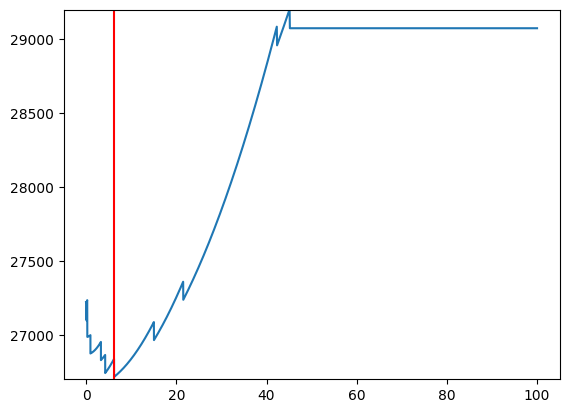

In [22]:
Risk, SList = lasso_LOOCV_Risk_approx(Coefs_Xs, Xs, y_raw)
plt.plot(alpha, Risk)
index = np.argmin(Risk)
alpha_hat = alpha[index]
S_hat = SList[index]
print("The optimal alpha is {}".format(alpha_hat))
print("The optimal S is {}".format(S_hat))
print("Beta's are {}".format(Coefs_Xs[index]))
print("Approximated Risk is {}".format(Risk[index]))
plt.axvline(alpha_hat, color = "r")
plt.show()

The optimal alpha is 6.195540608875728
The optimal S is 4
Beta's are [ 0.         -0.         24.05116767  9.09338114 -0.         -0.
 -5.42244809  0.         20.9107555   0.        ]
Exact Risk is 26728.212884853758


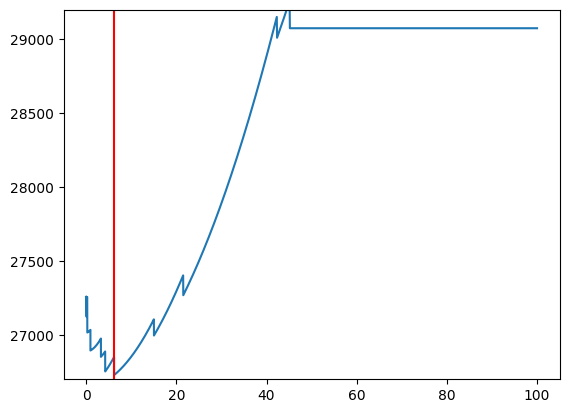

In [23]:
Risk, SList = lasso_LOOCV_Risk(Coefs_Xs, Xs, y_raw)
plt.plot(alpha, Risk)
index = np.argmin(Risk)
alpha_hat = alpha[index]
S_hat = SList[index]
print("The optimal alpha is {}".format(alpha_hat))
print("The optimal S is {}".format(S_hat))
print("Beta's are {}".format(Coefs_Xs[index]))
print("Exact Risk is {}".format(Risk[index]))
plt.axvline(alpha_hat, color = "r")
plt.show()

We use the exact lasso LOOCV risk.

In [24]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression(fit_intercept=False)
Xs_mod = lasso_mod_X(index, Coefs_Xs, Xs)
FeatureList_mod = lasso_mod_X(index, Coefs_Xs, FeatureList.reshape(1,-1))
OLS.fit(Xs_mod,y_raw)
Coef_optimal = OLS.coef_
print("The optimal features are {}".format(FeatureList_mod))
print("The optimal beta is {}".format(Coef_optimal))

The optimal features are [['bmi' 'bp' 'HDL' 'triglycerides']]
The optimal beta is [26.41215171 12.8270144  -9.22539497 23.06804894]


In [25]:
print("The optimal risk is {}".format(OLS_LOOCV_Risk(Coef_optimal, Xs_mod,y_raw)))

The optimal risk is 26649.20990389459


### Problem 2: Risky business (10 points)

In class [(and in these notes)](https://github.com/YData123/sds365-fa22/raw/main/notes/kernel-bias-variance.pdf) we sketched a proof that, when the regression function has two bounded derivatives,
 the bias and variance for kernel smoothing scale as

$$ \mbox{bias}^2 = O\left(h^4\right)$$
$$ \mbox{var} = O\left(\frac{1}{nh^p}\right).$$

Here $h$ is the bandwidth parameter, $n$ is the sample size, and $p$ is the number of predictor variables. These expressions are asymptotic, meaning that they apply as $n$ gets large and $h$ gets small.  In this problem your job is to reason about the implications of this bias-variance decomposition for prediction.

*Note:* For this problem, you may either enter your answers in Markdown using $\rm\LaTeX$, or you write them on paper and scan to insert as an image in the notebook; whichever you prefer.


### 2.1 Selecting the optimal bandwidth

Suppose that the bias and variance are such that

$$ \mbox{bias}^2(\widehat m(x))  \leq c_1 h^4 $$
$$ \mbox{var}(\widehat m(x)) \leq c_2 \frac{1}{nh^p}.$$

for two constants $c_1$ and $c_2$. Using these expressions and a little calculus, determine the optimal bandwidth $h$ to minimize the risk function

$$R(h) = {\mathbb E}\left(\widehat m(x) - m(x)\right)^2.$$

Your answer should involve the constants $c_1, c_2$, and $n$ and $p$. Give a bound on the resulting risk using this bandwidth.


### 2.2 Bandwith selection without tears

Now, going back to the expressions $\mbox{bias}^2 = O\left(h^4\right)$ and $ \mbox{var} = O\left(\displaystyle\frac{1}{nh^p}\right)$, explain why the scaling of the optimal bandwidth (as a function of $n$ and $p$), must satisfy
$\mbox{bias}^2  \approx \mbox{var}$; that is, they must be of the same order as $h\to 0$. Then, without using any calculus, use this argument to determine the optimal scaling of the bandwidth and the fastest rate at which the
risk $R(h) = {\mathbb E}\left(\widehat m(x) - m(x)\right)^2$ can approach zero as the sample size increases.


### 2.3 The cursed COD

Using the risk bound you derive above, make a plot that demonstrates the curse of dimensionality by plotting the sample size required to achieve a given level of risk. Specifically, let the target risk $R$ vary between 0.1 and 0.5, and let the dimension $p$ vary between 1 and 20, and plot the sample size required to achieve that risk. Give a single plot that shows the collection of curves for each dimension.




## 2.1

$$R(h) = {\mathbb E}[\widehat{m}(x)-m(x)]^2={\mathbb E}[(\widehat{m}(x)-{\mathbb E}(\widehat{m}(x)))+({\mathbb E}(\widehat{m}(x))-m(x))]^2$$

$$=\mbox{Var}[\widehat{m}(x)]+\mbox{Bias}^2+2{\mathbb E}[(\widehat{m}(x)-{\mathbb E}(\widehat{m}(x)))({\mathbb E}(\widehat{m}(x))-m(x))]$$

Since the 3rd term equals to $2({\mathbb E}(\widehat{m}(x))-m(x))\bullet{\mathbb E}[\widehat{m}(x)-{\mathbb E}(\widehat{m}(x))]=2({\mathbb E}(\widehat{m}(x))-m(x))\bullet[{\mathbb E}(\widehat{m}(x))-{\mathbb E}(\widehat{m}(x))]=0$

$$R(h)=\mbox{Var}[\widehat{m}(x)]+\mbox{Bias}^2 \leq \frac{c_2}{nh^p}+c_1h^4$$

Let $\rho(h)=\frac{c_2}{nh^p}+c_1h^4$,

$$\frac{d\rho(h)}{dh}=4c_1h^3-p\frac{c_2}{nh^{p+1}}=0$$

$$h_0 = \left(\frac{c_2p}{4c_1n}\right)^{\frac{1}{p+4}}$$

$$R\left(h_0\right)\leq\rho\left(h_0\right)=c_1\left(\frac{c_2p}{4c_1}\right)^{\frac{4}{p+4}}n^{\frac{-4}{p+4}}+\left(\frac{p}{4c_1}\right)^{\frac{-p}{p+4}}c_2^{\frac{4}{p+4}}n^{\frac{-4}{p+4}}$$

$$=O\left(\frac{1}{n^{\frac{4}{p+4}}}\right)$$

##2.2
$\mbox{Bias}^2$ increases as $h$ increases while $\mbox{Var}$ decreases. On one hand, if $\mbox{Bias}^2>>\mbox{Var}$, the risk can be smaller if $h$ becomes smaller. On the other hand, if $\mbox{Bias}^2<<\mbox{Var}$, the risk can be smaller if $h$ becomes larger. In conclusion, the risk approaches its minimun when $\mbox{Bias}^2\approx\mbox{Var}$

$$\mbox{Bias}^2=\mbox{Var}$$
$$O(h^4) = O\left(\frac{1}{nh^p}\right)$$
$$h_0=O\left(\frac{1}{n^{\frac{1}{p+4}}}\right)$$
$$R(h_0)=O\left(\frac{1}{n^{\frac{4}{p+4}}}\right)+O\left(\frac{1}{nn^{\frac{-4}{p+4}}}\right)=O\left(\frac{1}{n^{\frac{4}{p+4}}}\right)$$

##2.3

Text(0.5, 0, 'Risk')

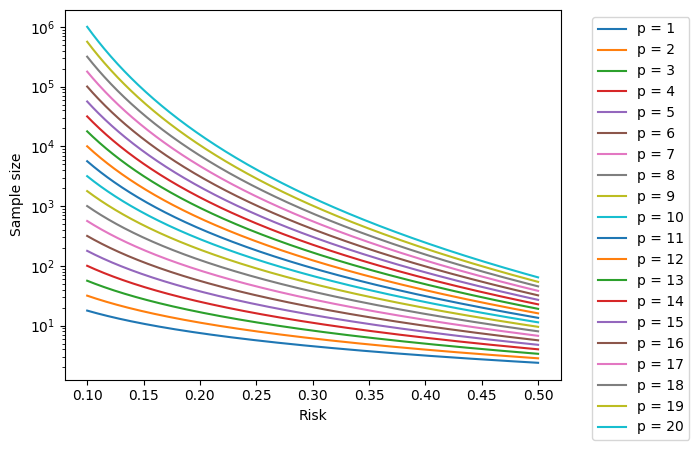

In [6]:
pList = np.arange(1,21,1)
R = np.arange(0.1,0.501,0.001)
for p in pList:
  plt.plot(R,(1/R)**((p+4)/4),label = "p = {}".format(p))
plt.legend(bbox_to_anchor=(1.05,1))
plt.yscale("log")
plt.ylabel("Sample size")
plt.xlabel("Risk")

### Problem 3: A kernel of truth (15 points)

For problem you will implement nonparametric regression using Mercer kernels and penalization, in 1-dimension. This can be compared to regression using smoothing kernels.

As discussed in lecture, nonparametric regression with Mercer kernels is based on the infinite dimensional ridge regression

$$ \widehat m = \mbox{argmin} [\| Y - m \|^2 + \lambda \|m\|_K^2]$$

By the representer theorem, this is equivalent to setting $\widehat m(x) = \sum_{i=1}^n \widehat \alpha_i K(X_i, x)$ and
using the finite dimensional optimization

$$ \widehat \alpha = \mbox{argmin} [\| Y - {\mathbb K} \alpha \|^2 + \lambda \alpha^T {\mathbb K} \alpha]$$

###  3.1 Solve

Derive a closed-form expression for the minimizer $\widehat\alpha$. Show all of the steps in your derivation,
and justify each step. (As above, you may either enter your answers in Markdown using $\rm\LaTeX$, or insert an image of your handwritten solution.)


$$l(\boldsymbol{\alpha})=\|\mathbf{Y}-\mathbf{K}\boldsymbol{\alpha}\|^2+\lambda\boldsymbol{\alpha}^T\mathbf{K}\boldsymbol{\alpha}=\mathbf{Y}^T\mathbf{Y}-\mathbf{Y}^T\mathbf{K}\boldsymbol{\alpha}-\boldsymbol{\alpha}^T\mathbf{K}^T\mathbf{Y}+\boldsymbol{\alpha}^T\mathbf{K}^T\mathbf{K}\boldsymbol{\alpha}+\lambda\boldsymbol{\alpha}^T\mathbf{K}\boldsymbol{\alpha}$$

$$\nabla_\boldsymbol{\alpha}J(\alpha)=-2\mathbf{K}^T\mathbf{Y}+2\mathbf{K}^T\mathbf{K}\boldsymbol{\alpha}+2\lambda\mathbf{K}\boldsymbol{\alpha}=0$$

Since $\mathbf{K}=\mathbf{K}^T$,

$$\mathbf{K}(\mathbf{K}+\lambda)\boldsymbol{\alpha}=\mathbf{K}\mathbf{Y}$$

If $\mathbf{K}$ and $\mathbf{K}+\lambda$ are invertible,

$$\boldsymbol{\alpha} = (\mathbf{K}+\lambda)^{-1}\mathbf{Y}$$

###  3.2 Implement

Next you will use your solution above and implement Mercer kernel regression. We give some starter code.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep

The following cell defines some "helper functions" for this exercise. You don't need to change any of this code.
(If you do want to make changes, just describe what you did and why.)

In [37]:
def plot_estimate(x, f, fhat, X, y, sigma, lmbda, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.plot(x, f, color='red', linewidth=2, label='true function')
    plt.plot(x, fhat, color='blue', linewidth=2, label='estimated function')
    plt.scatter(X, y, color='black', alpha=.5, label='random sample')
    plt.ylim(np.min(f)-4*sigma, np.max(f)+4*sigma)
    plt.legend(loc='upper left')
    plt.title('lambda: %.3g' % lmbda)
    plt.xlabel('x')
    plt.ylabel('estimated m(x)')
    plt.show()
    sleep(sleeptime)

def true_fn(x):
    return 3*x**2

def run_simulation(kernel, lmbdas, show_bias_variance=True):
    min_x, max_x = -1, 1
    x = np.linspace(min_x, max_x, 100)
    f = true_fn(x)
    sigma = .25
    estimates = []
    trials = 500

    for lmbda in lmbdas:
        estimates_lambda = []
        for i in np.arange(trials):
            X = np.sort(np.random.uniform(low=min_x, high=max_x, size=50))
            fX = true_fn(X)
            y = fX + sigma*np.random.normal(size=len(X))
            fhat = mercer_kernel_regress(kernel, X, y, x, lmbda=lmbda)
            if i % 50 == 0:
                plot_estimate(x, f, fhat, X, y, sigma, lmbda)
            estimates_lambda.append(fhat)
        estimates.append(estimates_lambda)

    if show_bias_variance == False:
        return

    fhat = np.array(estimates)
    sq_bias = np.zeros(len(lmbdas))
    variance = np.zeros(len(lmbdas))

    for i in np.arange(len(lmbdas)):
        sq_bias[i] = np.mean((np.mean(fhat[i], axis=0) - f)**2)
        variance[i] = np.mean(np.var(fhat[i], axis=0))

    lmbda_hat = lmbdas[np.argmin(sq_bias+variance)]
    print("Lambda_hat is {}".format(lmbda_hat)) #Print out Lambda_hat which leads to the smallest risk

    plt.figure(figsize=(10,6))
    plt.plot(lmbdas, sq_bias, label='squared bias', linewidth=2)
    plt.plot(lmbdas, variance, label='variance', linewidth=2)
    plt.plot(lmbdas, sq_bias + variance, label='risk')
    plt.axvline(lmbda_hat, color='red', label='lambda_hat')
    plt.legend()
    plt.show()


Your job is to implement Mercer kernel regression and run it on two
different kernel functions. The two kernels could simply be the Gaussian kernel
with two different bandwidths, or you might experiment with other kernels.

The function `mercer_kernel_regress` takes a kernel, training data `X` and `y`, an array of values `x` to evaluate the function on, and a regularization parameter. You'll use your derivation above to
determine the coefficients $\alpha$. For some clues and suggestions on how to do the
implementation, see our demo code for smoothing kernels. You need to do something very similar.


In [28]:
def mercer_kernel_regress(kernel, X, y, x, lmbda):
  K_train = np.zeros((len(X),len(X)))
  for j in np.arange(K_train.shape[1]):
    K_train[:,j] = kernel(X,X[j])
  for i in np.arange(K_train.shape[0]):
    K_train[i,i] = K_train[i,i]+lmbda
  alpha = np.linalg.solve(K_train,y)

  K_test = np.zeros((len(x),len(X)))
  for j in np.arange(K_test.shape[1]):
    K_test[:,j] = kernel(x,X[j])

  fhat = K_test@alpha
  return fhat

def kernel1(x,y): #x is ndarray, y is float
  h=0.1
  return np.exp(-(x-y)**2/(2*h**2))


def kernel2(x,y): #x is ndarray, y is float
  h=0.5
  return np.exp(-(x-y)**2/(2*h**2))

###  3.3 Run two simulations and select regularization parameters

Finally, using our starter code and your own implementation above, run two simulations, one
using `kernel1` and the other using `kernel2`. After each simulation, select a regularization level from the bias-variance tradeoff, and then run a final simulation with that regularization level. In the following
starter code, you only need to specify the sequence of regularization parameters.


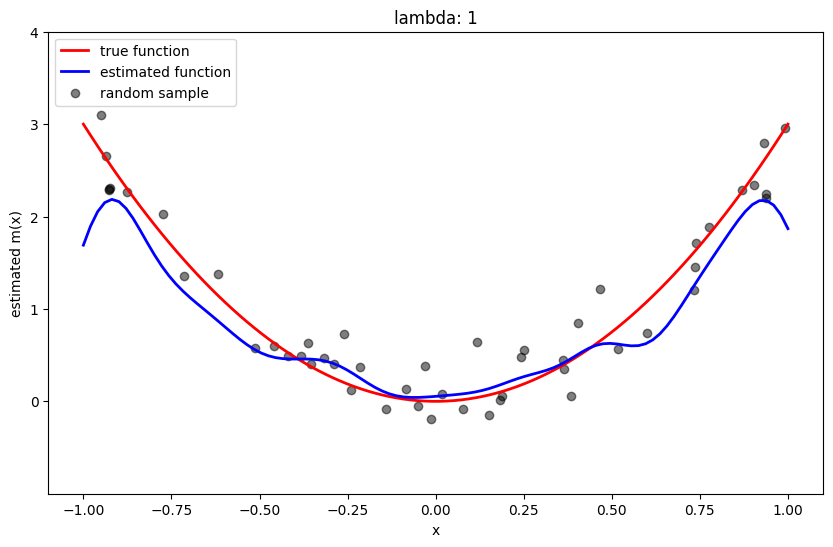

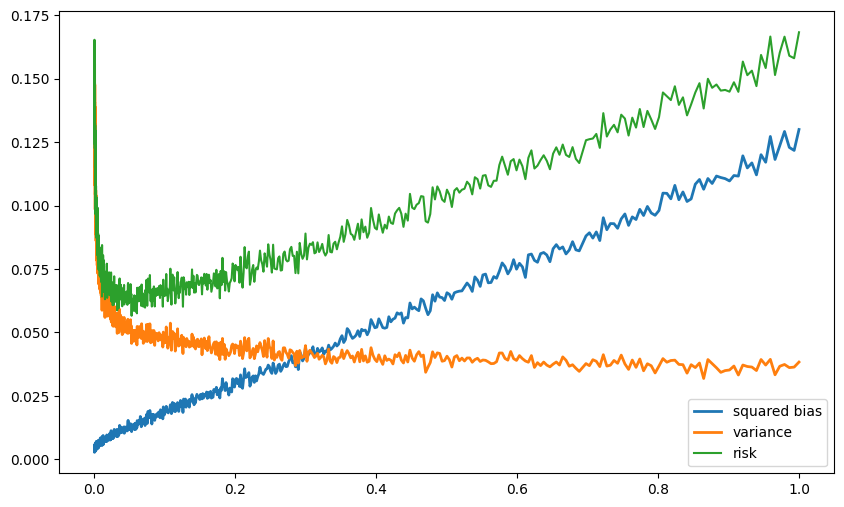

In [30]:
lmbdas = np.logspace(-3,0,1000)
run_simulation(kernel1, lmbdas)

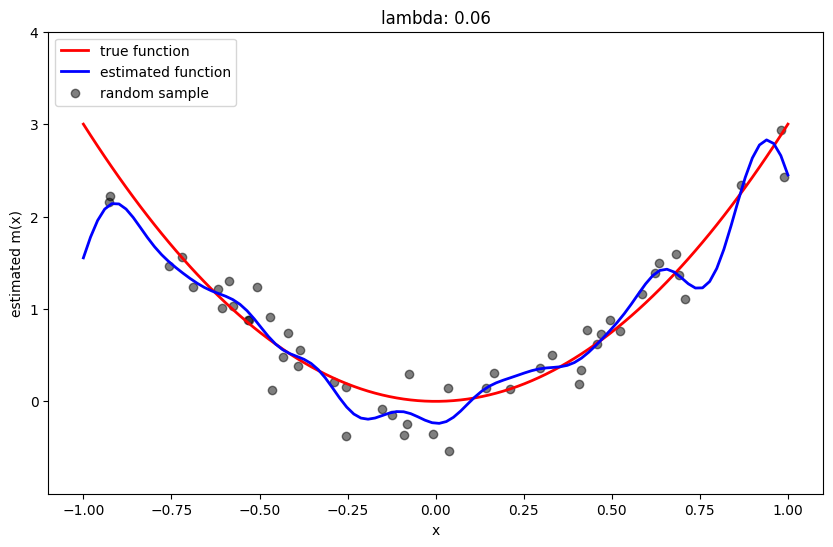

In [31]:
lambda_hat = [0.06]
run_simulation(kernel1, lambda_hat, show_bias_variance=False)

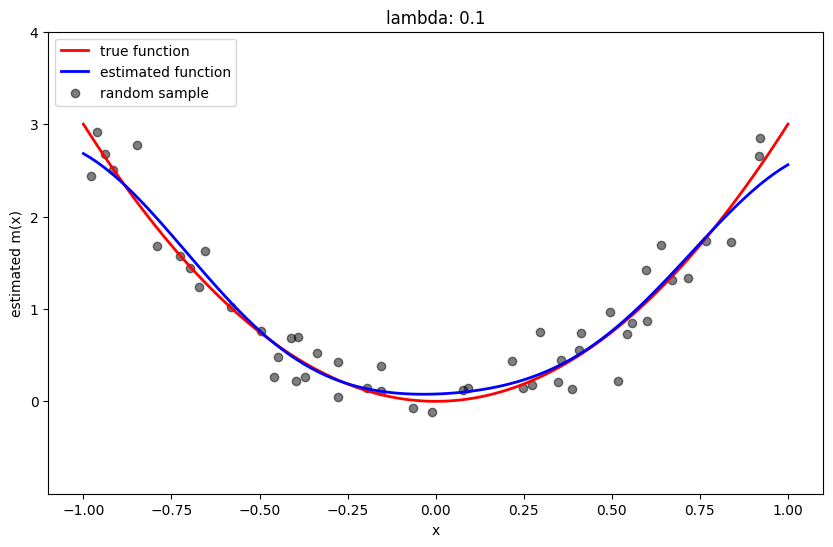

Lambda_hat is 0.004641588833612777


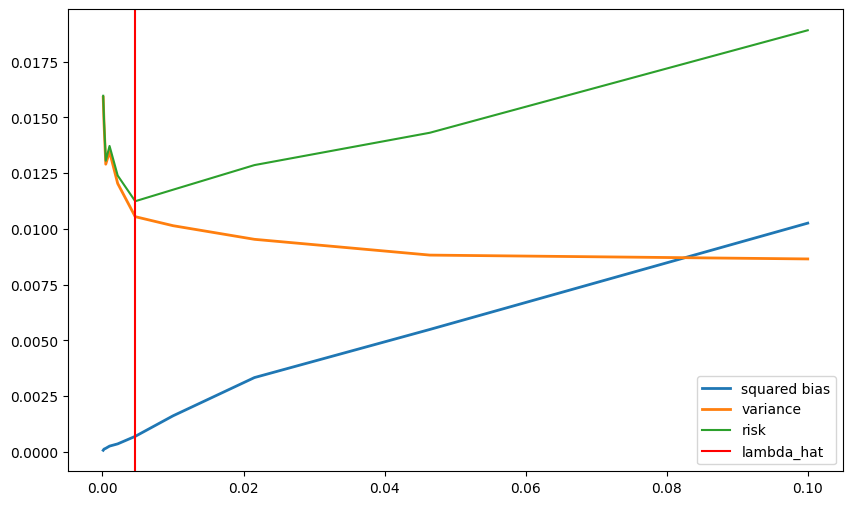

In [38]:
lmbdas = np.logspace(-4,-1,10)
run_simulation(kernel2, lmbdas)

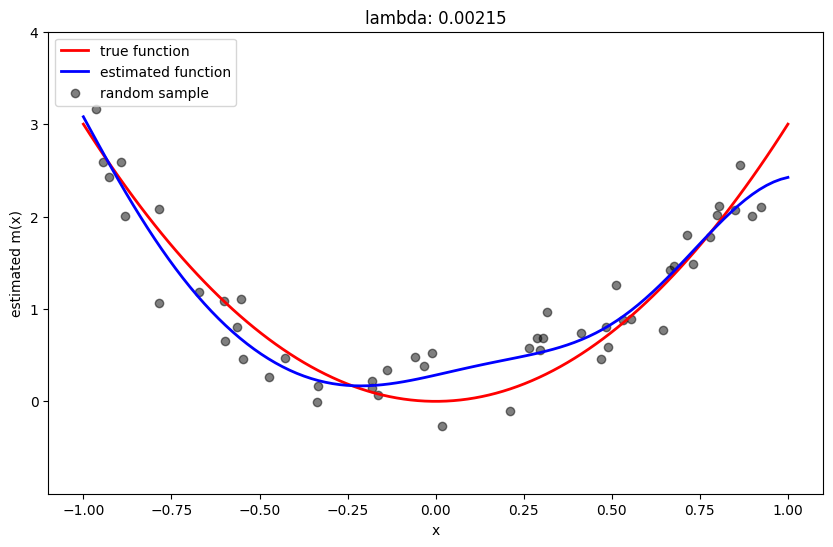

In [36]:
lambda_hat = [0.002154434690031882]
run_simulation(kernel2, lambda_hat, show_bias_variance=False)

### Problem 4: An algebraic simplification of LOOCV (15 points)

Leave-One-Out Cross Validation (LOOCV) is a specific type of
$K$-fold cross validation where $K$ equals the number of observations in the dataset.
It works as follows for a training set with $n$ observations:

1. A single observation is used as the validation set,
    and the remaining $n-1$ observations serve as the training set.
2. A model is trained on the $n-1$ observations and
    validated on the single left-out observation.
3. This process is repeated $n$ times, each time leaving out a different
    observation as the validation set.
4. The LOOCV error is then the average error across all $n$ trials.

LOOCV is particularly useful because:
- It utilizes almost all the data for training,
    so it's less prone to high variance compared to other validation schemes.
- Since each observation is tested exactly once,
    LOOCV provides a very thorough out-of-sample testing mechanism.

However, it can be computationally expensive because you have to fit the model $n$ times.
    Luckily, for some models, there are algebraic simplifications available
    that make it computationally efficient.
    Expressing LOOCV in terms of the hat matrix allows for efficient
    computation of the LOOCV error without the need to refit the model for
    each left-out observation, making it a valuable tool for model evaluation.

Recall that the LOOCV error can be expressed as:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \widehat{y}_{-i} \right)^2, $$

where $\widehat{y}_{-i}$ represents the prediction for the $i^{th}$ observation
when it's left out from the training process.
In the following questions, you will be deriving an alternative expression
of the LOOCV error for both kernel and ridge regression, following the hints below.

### 1. LOOCV for kernel smoothing:

For kernels, we know that the LOOCV error can be equivalently written as the following form:

$$ LOOCV = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{y_i - \widehat y_i}{1 - L_{ii}} \right)^2, $$
where $\widehat y_i$ is the predicted value from the model fit on all data, and
$L_{ii}$ is the $i^{th}$ diagonal element of the hat matrix $L$.

For kernel regression, we have
$$ \widehat{y} = L y, $$
where
- $ \widehat{y} $ is the vector of predictions.
- $ y $ is the observed response values.
- $ L $ is the hat matrix and is defined by the kernel (for a given bandwidth).
So, each diagonal element $ L_{ii} $ of the matrix $ L $ is defined as:
$$ L_{ii} = \frac{K\left(x_i, x_i\right)}{\sum_{j=1}^{n} K\left(x_i, x_j\right)}, $$
where
- $ K $ is the kernel function.
- $ x_i $ and $ x_j $ are the predictor values for observations $ i $ and $ j $, respectively.

The diagonal elements $ L_{ii} $ give the "leverage" of each observation, which can be interpreted as the influence an observation has on its own prediction.

Derive this alternative expression of the LOOCV error for kernel regression. That's to say, for kernel regression, prove that

$$ y_i - \widehat{y}_{-i}  =  \frac{y_i - \widehat y_i}{1 - L_{ii}}$$

Proof:

$$\widehat{y}_k=\sum_iL_{ki}y_i=\frac{\sum_iK(x_k,x_i)y_i}{\sum_jK(x_k,x_j)}$$
$$\widehat{y}_{-k}=\sum_{i\neq k}L_{ki}y_i=\frac{\sum_{i\neq k}K(x_k,x_i)y_i}{\sum_{j\neq k}K(x_k,x_j)}$$
$$y_k-\widehat{y}_{-k}=\frac{\sum_{i\neq k}K(x_k,x_i)(y_k-y_i)}{\sum_{j\neq k}K(x_k,x_j)}$$
$$=\frac{\sum_{i}K(x_k,x_i)(y_k-y_i)-K(x_k,x_k)(y_k-y_k)}{\sum_{j}K(x_k,x_j)-K(x_k,x_k)}$$
$$=\frac{\sum_{i}K(x_k,x_i)(y_k-y_i)}{\sum_{j}K(x_k,x_j)-K(x_k,x_k)}$$
$$=\frac{\sum_{i}K(x_k,x_i)(y_k-y_i)/\left(\sum_{j}K(x_k,x_j) \right)}{1-L_{kk}}$$
$$=\frac{y_k-\widehat{y}_k}{1-L_{kk}}$$

## Problem 5: LASSO and Elastic Net

In class, we derived the solution for the one-dimensional LASSO using convexity and subgradients. We also know that coordinate descent can be used to solve LASSO in the high-dimensional case. Sometimes, we introduce a penalty that is a mixture of the $\ell_1$ and $\ell_2$ norms,  

$$
\lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|_2^2,
$$  

which is referred to as the **Elastic Net**. This problem demonstrates how the Elastic Net can be computed using the LASSO.

Let us first recall the one-dimensional LASSO objective:

$$
f(\beta) = \frac{a}{2}\beta^2 - b\beta + \lambda |\beta|,
\qquad a > 0,\; \lambda \ge 0.
$$

The minimizer is given by

$$
\widehat{\beta} = \frac{\operatorname{sign}(b)\,\big(|b| - \lambda\big)_+}{a},
$$

where $(x)_+ = \max\{x,0\}$.

5.1 Solve the one-dimensional LASSO problem

$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n}\sum_{i=1}^n (y_i - \beta x_i)^2 + \lambda |\beta| \right\},
$$

where $\lambda \geq 0$ and at least one $x_i \neq 0$.

$$\widehat{\beta}=\arg\min_\beta\left\{ \frac{\beta^2}{2}\sum_{i=1}^n \frac{x_i^2}{n}-\beta\sum_{i=1}^n\frac{x_iy_i}{n}+\lambda|\beta|+\sum_{i=1}^n \frac{y_i^2}{2n}\right\}$$
From the conclusion above,
$$\widehat{\beta}=\frac{\operatorname{sign}(\sum_{i=1}^nx_iy_i)\left(|\sum_{i=1}^nx_iy_i|-n\lambda \right)_{+}}{\sum_{i=1}^n x_i^2}$$

5.2 Solve the one-dimensional Elastic Net
$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n} \sum_{i=1}^n (y_i - \beta x_i)^2 + \lambda_1 |\beta| + \lambda_2 \beta^2 \right\},
$$

where $\lambda_1 \geq 0$, $\lambda_2 \geq 0$, and at least one $x_i \neq 0$.  

*Hint:* Convert this problem into the form of 5.1. What happens if we observe a new data point $(\sqrt{2n\lambda_2}, 0)$?

$$\widehat{\beta}=\arg\min_\beta\left\{ \frac{\beta^2}{2}\left(\sum_{i=1}^n \frac{x_i^2}{n}+2\lambda_2\right)-\beta\sum_{i=1}^n\frac{x_iy_i}{n}+\lambda_1|\beta|+\sum_{i=1}^n \frac{y_i^2}{2n}\right\}$$
$$\widehat{\beta}=\frac{\operatorname{sign}(\sum_{i=1}^nx_iy_i)\left(|\sum_{i=1}^nx_iy_i|-n\lambda_1 \right)_{+}}{\sum_{i=1}^n x_i^2+2n\lambda_2}$$

5.3 Now consider the case where we have data $\mathbf{Y} \in \mathbb{R}^n$ and $\mathbf{X} \in \mathbb{R}^{n \times p}$. We want to find an estimator

$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n}\| \mathbf{Y} - \mathbf{X}\beta\|_2^2 + \lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|_2^2 \right\}.
$$

Assume we have access to an oracle that can solve the LASSO. How can we use it to solve the Elastic Net?  

*Hint:* Construct augmented variables $\mathbf{Y}^*$ and $\mathbf{X}^*$
(not necessarily the same shapes as $\mathbf{Y}$ and $\mathbf{X}$) and show that the objective is equivalent to
$$
\frac{1}{2\,\mathrm{len}(\mathbf{Y}^*)}
\|\mathbf{Y}^* - \mathbf{X}^*\beta\|_2^2
+ \lambda_1 \|\beta\|_1.
$$

We want
$$\frac{1}{2m}\left(\mathbf{Y^*}^T\mathbf{Y^*}-2\mathbf{Y^*}^T\mathbf{X^*}\beta+\beta^T\mathbf{X^*}^T\mathbf{X^*}\beta\right)
\equiv
\frac{1}{2n}\left(\mathbf{Y}^T\mathbf{Y}-2\mathbf{Y}^T\mathbf{X}\beta+\beta^T\mathbf{X}^T\mathbf{X}\beta\right)+\lambda_2\beta^T\beta$$

First check how to construct $\mathbf{X^*}$ such that
$$\frac{1}{2m}\beta^T\mathbf{X^*}^T\mathbf{X^*}\beta \equiv \frac{1}{2n}\beta^T\mathbf{X}^T\mathbf{X}\beta+\lambda_2\beta^T\beta$$

That is
$$\mathbf{X^*}\beta = \begin{bmatrix}\sqrt{m/n}\mathbf{X}\beta\\\sqrt{2m\lambda_2}\beta\end{bmatrix}$$
So
$$\mathbf{X^*} = \begin{bmatrix}\sqrt{m/n}\mathbf{X}\\\sqrt{2m\lambda_2}\mathbf{D}_{p\times p}\end{bmatrix}$$

Then check how to construct $\mathbf{Y^*}$ such that
$$\frac{1}{m}\mathbf{Y^*}^T\mathbf{X^*}\beta \equiv \frac{1}{n}\mathbf{Y}^T\mathbf{X}\beta$$
So
$$\mathbf{Y^*}=\begin{bmatrix}\sqrt{m/n}\mathbf{Y}\\ \mathbf{0}_{p\times 1}\end{bmatrix}$$

We can set $m=\mathrm{len}(\mathbf{Y}^*)=n+p$
Then
$$\mathbf{X^*} = \begin{bmatrix}\sqrt{\mathrm{len}(\mathbf{Y}^*)/n}\mathbf{X}\\\sqrt{2\mathrm{len}(\mathbf{Y}^*)\lambda_2}\mathbf{D}_{p\times p}\end{bmatrix}$$
$$\mathbf{Y^*}=\begin{bmatrix}\sqrt{\mathrm{len}(\mathbf{Y}^*)/n}\mathbf{Y}\\ \mathbf{0}_{p\times 1}\end{bmatrix}$$

5.4 Now revisit the diabetes dataset from the first problem. Apply the result you derived, together with the `Lasso` implementation from `sklearn.linear_model`, to solve the elastic net. Specifically, we want to solve

$$
\widehat{\beta} = \arg\min_\beta \left\{ \frac{1}{2n}\|\mathbf{Y} - \mathbf{X}\beta\|_2^2
+ \lambda_1 \|\beta\|_1
+ \lambda_2 \|\beta\|_2^2 \right\},
$$
where $\lambda_1 = \lambda_2 = 0.1$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
%matplotlib inline
X, y = load_diabetes(return_X_y=True)
X = np.hstack([np.ones((X.shape[0], 1)), X])
n, p = X.shape
n, p = X.shape

lambda1,lambda2 = 0.1, 0.1
# y_star = your code here
Len_y_star = n+p
y_star = np.hstack([np.sqrt(Len_y_star/n)*y,np.zeros(p)])
# X_star = your code here
X_star = np.vstack([np.sqrt(Len_y_star/n)*X,np.sqrt(2*Len_y_star*lambda2)*np.identity(p)])


model = Lasso(alpha=lambda1, fit_intercept=False)
model.fit(X_star, y_star)
your_coef = model.coef_

# You can use the following code to verify your answer
from sklearn.linear_model import ElasticNet
lambda1, lambda2 = 0.1, 0.1
alpha = lambda1 + 2 * lambda2
l1_ratio = lambda1 / (lambda1 + 2 * lambda2)

# Fit ElasticNet with your X, y
model = ElasticNet(alpha=alpha,
                   l1_ratio=l1_ratio,
                   fit_intercept=False,
                   max_iter=10000,
                   tol=1e-6,
                   selection='cyclic')

model.fit(X, y)
elastic_coef = model.coef_
print(np.linalg.norm(your_coef - elastic_coef)/np.linalg.norm(elastic_coef))  # should be a very small number

2.473299603237532e-07


5.5 Which values of $\lambda_1$ and $\lambda_2$ are appropriate? A common approach is to use cross-validation. For simplicity, split the data once into training and validation sets, fit the model with different $(\lambda_1,\lambda_2)$, and compare the mean squared error (MSE) on the validation set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
scalerX, scalery = StandardScaler(), StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)
y_train = scalery.fit_transform(y_train.reshape(-1,1)).ravel()
y_test = scalery.transform(y_test.reshape(-1,1)).ravel()
grid = np.linspace(0.001, 1.0, 30)
params = []
mses = []

n,p = X_train.shape

for lambda1 in grid:
    for lambda2 in grid:
        # fit a elastic net with lambda1 and lambda2 on (X_train, y_train), compute the mse on (X_test, y_test)
        # you should use Lasso from sklearn. don't use ElasticNet.
        # y_train_star
        Len_y_train_star = n+p
        y_train_star = np.hstack([np.sqrt(Len_y_train_star/n)*y_train,np.zeros(p)])
        # X_train_star
        X_train_star = np.vstack([np.sqrt(Len_y_train_star/n)*X_train,np.sqrt(2*Len_y_train_star*lambda2)*np.identity(p)])

        model = Lasso(alpha=lambda1, fit_intercept=False)
        model.fit(X_train_star, y_train_star)
        mse = mean_squared_error(y_test, model.predict(X_test))
        params.append((lambda1, lambda2))
        mses.append(mse)
your_lambda1,your_lambda2 = params[np.argmin(mses)]

#You can verify your answer using the following code
params2 = []
mses2 = []
for lambda1 in grid:
    for lambda2 in grid:
        alpha = lambda1 + 2 * lambda2
        l1_ratio = lambda1 / (lambda1 + 2 * lambda2)
        model = ElasticNet(alpha=alpha,
                   l1_ratio=l1_ratio,
                   fit_intercept=False,
                   max_iter=10000,
                   tol=1e-6,
                   selection='cyclic')
        model.fit(X_train, y_train)
        mse = mean_squared_error(y_test, model.predict(X_test))
        params2.append((lambda1, lambda2))
        mses2.append(mse)
select_lambda1,select_lambda2 = params2[np.argmin(mses2)]

print(your_lambda1 == select_lambda1 and your_lambda2 == select_lambda2)   # should be True

True
